In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import mathis as mt
import math
from sklearn.linear_model import LassoCV, RidgeCV, LinearRegression, LogisticRegressionCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [2]:
train = pd.read_csv("datasets/modified_train.csv")
test = pd.read_csv("datasets/modified_test.csv")

train = train.drop(columns = ['Unnamed: 0'])
test = test.drop(columns = ['Unnamed: 0'])

house = train.append(test)

# Data Engineering

***Ordinals to numbers***

- Convert ordinal string columns into numbers more usable by a Linear model.

In [3]:
ord_dict = {'ex': 5, 'gd': 4, 'ta':3, 'fa':2, 'po':1, 'nan': 0}
ord_cats = ['exter_qual', 'exter_cond', 'bsmt_qual', 'bsmt_cond', 'heating_qc', 'kitchen_qual', 'fireplace_qu', 'garage_qual', 'garage_cond', 'pool_qc']

for col in ord_cats:
    house[col] = house[col].map(lambda x: ord_dict[str(x).lower()])

In [4]:
ord_dict = {'gd':4, 'av':3, 'mn':2, 'no':1, 'nan':0, '0':0}
house['bsmt_exposure'] = house['bsmt_exposure'].map(lambda x: ord_dict[str(x).lower()])

In [5]:
ord_dict = {'fin':3, 'rfn':2, 'unf':1, 'nan':0}
house['garage_finish'] = house['garage_finish'].map(lambda x: ord_dict[str(x).lower()])

In [6]:
ord_dict = {'glq':6, 'alq':5, 'blq':4, 'rec':3, 'lwq':2, 'unf':1, 'nan':0}
house['bsmt_fin_type_1'] = house['bsmt_fin_type_1'].map(lambda x: ord_dict[str(x).lower()])
house['bsmt_fin_type_2'] = house['bsmt_fin_type_2'].map(lambda x: ord_dict[str(x).lower()])

In [7]:
ord_dict = {'typ':7, 'min1':6, 'min2':5, 'mod':4, 'maj1':3, 'maj2':2, 'sev':1, 'sal':0}
house['functional'] = house['functional'].map(lambda x: ord_dict[str(x).lower()])

- Second pairplot created at this step

***Determine features to bucket together***

- The section did not improve errors or inference, so it has been set not to run.

In [8]:
house['ms_sub_class'] = house['ms_sub_class'].map(str)

In [9]:
obs = [col for col in house.columns.tolist() if house[col].dtypes == np.dtype('O')]

***Dummy categoricals***

In [10]:
house.shape

(2929, 82)

In [11]:
house = pd.get_dummies(house, columns = obs, drop_first = True, dummy_na = True)

In [12]:
house.shape

(2929, 256)

***Delete outliers that negatively affect linear sale price relationship based on visual analysis of pairplot2***

In [13]:
train = house[house['training'] == 1]
test = house[house['training'] == 0]

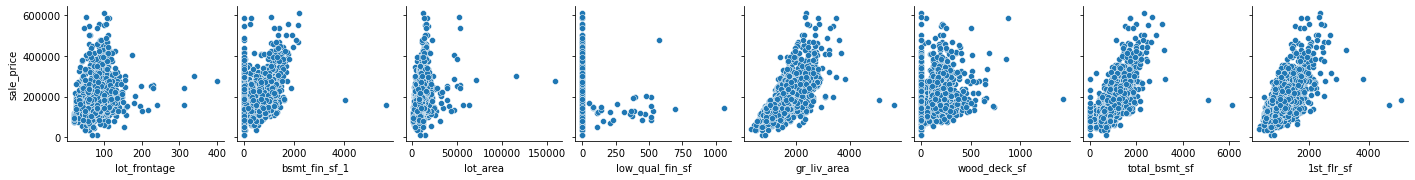

In [14]:
sns.pairplot(train, x_vars = ['lot_frontage', 'bsmt_fin_sf_1', 'lot_area', 'low_qual_fin_sf', 'gr_liv_area', 'wood_deck_sf', 'total_bsmt_sf', '1st_flr_sf'], y_vars = ['sale_price'])
plt.show()

- Plots of visible outliears that are to be culled.

In [15]:
train = train[train['lot_frontage'] < 300]

In [16]:
train = train[train['bsmt_fin_sf_1'] < 3000]

In [17]:
train = train[train['lot_area'] < 100000]

In [18]:
train = train[train['low_qual_fin_sf'] < 800]

In [19]:
train = train[train['gr_liv_area'] < 4000]

In [20]:
train = train[train['wood_deck_sf'] < 1000]

In [21]:
train = train[train['total_bsmt_sf'] < 4000]

In [22]:
train = train[train['1st_flr_sf'] < 4000]

- Second pass

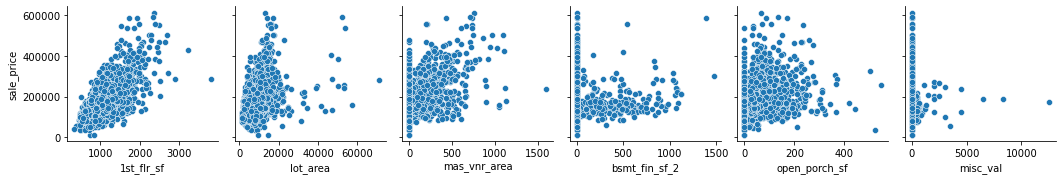

In [23]:
sns.pairplot(train, x_vars = ['1st_flr_sf', 'lot_area', 'mas_vnr_area', 'bsmt_fin_sf_2', 'open_porch_sf', 'misc_val'], y_vars = ['sale_price'])
plt.show()

- Plots of visible outliears that are to be culled.

In [24]:
train = train[train['1st_flr_sf'] < 3000]

In [25]:
train = train[train['lot_area'] < 30000]

In [26]:
train = train[train['mas_vnr_area'] < 800]

In [27]:
train = train[train['bsmt_fin_sf_2'] < 1200]

In [28]:
train = train[train['open_porch_sf'] < 400]

In [29]:
train = train[train['misc_val'] < 3000]

- Most of these values had high values of a single type while not showing a substanstitive increase in price. These are not useful for general remodeling price improvements of specifically low value homes.

***Save files***

In [30]:
train.to_csv("datasets/modified_train.csv")
test.to_csv("datasets/modified_test.csv")

***To step 3***